# Programmieraufgabe III (5+5+5+5 = 20 Punkte)
## Abgabe in der Woche 3.-7. Dezember

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Teilaufgabe a)

Implementieren Sie die __einfache Vektoriteration nach von Mises__. Input soll sein

* eine Funktion $\texttt{Afun}$, die die Anwendung eines linearen Operators beschreibt, 
* ein Startvektor $z_0$ (nicht notwendigerweise normiert), 
* eine maximale Anzahl von Iterationen $\text{it}_\text{max}$ sowie eine Toleranz $\varepsilon$, derart dass die Iteration stoppt, wenn zwei aufeinanderfolgende Eigenvektorapproximationen sich nur um Norm $<\varepsilon$ unterscheiden. 

Output sollen Näherungen des gesuchten Eigenwerts und des zugehörigen Eigenvektors sein. Zusätzlich sollen jeweils Listen mit allen Iterierten (für Eigenwert und Eigenvektor) ausgegeben werden. Falls die Toleranz nicht erreicht wird, soll eine Fehlermeldung ausgegeben werden.

In [2]:
#TODO define eigval, eigvallist


def vectoriteration(Afun, z0, itmax, epsilon):
    
    zlist = [z0]
    
    for it in range(itmax):
        
        zold = zlist[-1]
        
        z = Afun(zold)
        z = z / np.linalg.norm(z)
        
        zlist.append(z)
        
        if np.linalg.norm(z - zold) < epsilon: break
        
    if it + 1 == itmax: print("precision error")
    
    return z, zlist
    # return eigval, z, eigvallist, zlist

Testen Sie Ihre Implementierung an der $4\times 4$-Matrix $A = \begin{pmatrix} 1 & & & \\ & 2 & & \\ & & 2 & \\ & & & 2 \end{pmatrix}$. Welche Konvergenzgeschwindigkeit für die Eigenwertnäherungen können Sie beobachten?

Wie ändert sich das Konvergenzverhalten, wenn Sie eine Nebendiagonale mit den Einträgen $0$, $1$, $1$ hinzufügen, d.h. für 
$A' = \begin{pmatrix} 1 & 0 & & \\ & 2 & 1 & \\ & & 2 & 1 \\ & & & 2 \end{pmatrix}$?

In [3]:
def Afun(x):
    A = np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 2, 0], [0, 0, 0, 2]])
    return A @ x

def A2fun(x):
    A = np.array([[1, 0, 0, 0], [0, 2, 1, 0], [0, 0, 2, 1], [0, 0, 0, 2]])
    return A @ x

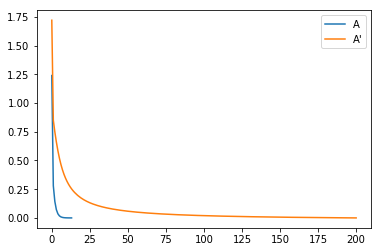

In [4]:
#TODO ersetze 'zlist' durch 'eigvallist'


itmax = 1000
epsilon = .0001

x0 = np.array([1, 1, 1, 1])
y0 = np.array([1, 1, 1, 1])


x, xlist = vectoriteration(Afun, x0, itmax, epsilon)
xplot = [np.linalg.norm(xval - x) for xval in xlist]

y, ylist = vectoriteration(A2fun, y0, itmax, epsilon)
yplot = [np.linalg.norm(yval - y) for yval in ylist]


plt.plot(xplot, label="A")
plt.plot(yplot, label="A\'")

plt.legend()
plt.show()
plt.close()

## Teilaufgabe b)

Sei $B$ diejenige $n \times n$-Matrix mit Einträgen $b$ auf der Hauptdiagonalen und Einträgen $-1$ auf den beiden Nebendiagonalen. Testen Sie Ihre Implementierung aus Aufgabe a), indem Sie den betragsmäßig größten Eigenwert von $B$ für verschiedene $b> 2$ bzw. $n \in \mathbb{N}$ berechnen.

Welche Konvergenzgeschwindigkeit hinsichtlich der Eigenwerte können Sie beobachten? Interpretieren Sie Ihre Ergebnisse.

In [5]:
n = 10
b = 42
B = []
for j in range(n):
    row = []
    for i in range(n):
        if i == j: row.append(b)
        elif i == j - 1: row.append(-1)
        elif i == j + 1:row.append(-1)
        else: row.append(0)
    B.append(row)
    

def Bfun(x):
    global B
    B = np.array(B)
    return B @ x

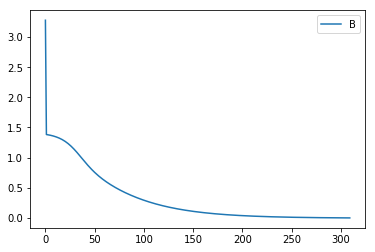

In [6]:
#TODO ersetze 'zlist' durch 'eigvallist'


itmax = 1000
epsilon = .0001

x0 = np.ones(n)


x, xlist = vectoriteration(Bfun, x0, itmax, epsilon)
xplot = [np.linalg.norm(xval - x) for xval in xlist]


plt.plot(xplot, label="B")

plt.legend()
plt.show()
plt.close()

## Teilaufgabe c)

Implementieren Sie die __inverse Iteration__ zur Bestimmung des betragsmäßig kleinsten Eigenwerts einer invertierbaren Matrix. Input darf hier also eine Matrix als numpy-array sein; die restlichen Inputs sollen wie in a) gewählt werden.  

Wenden Sie Ihre Funktion auf die Matrix $B$ aus der vorhergehenden Aufgabe an und plotten Sie erneut die Konvergenzgeschwindkeiten für verschiedene $b$ und $n$.

In [7]:
def inverseiteration(A, z0, itmax, epsilon):
    
    # to be filled in
    
    return

## Teilaufgabe d)

Gegeben Sei nun die Diagonalmatrix $D_m \in \mathbb{R}^{10 \times 10}$ mit den ersten $m$ Diagonaleinträgen $10$ und den letzten $(10-m)$ Diagonaleinträgen $2$. Ferner sei die Matrix $C = C(c) \in \mathbb{R}^{10 \times 10}$ für $c \in (-1,1)$ definiert durch $C_{10,j} = C_{j,10}=c$ für $j = 1,...,9$; alle anderen Einträge sind Null.

Bestimmen Sie jeweils einen Eigenwert $\lambda(c)$ der gestörten Matrix $D_m+C(c)$, der möglichst nahe am Eigenwert $2$ der ursprünglichen Matrix $D_m$ liegt und plotten Sie den Verlauf von $\lambda(c)$ für variierendes $c \in (-0.01,0.01)$. Implementieren und verwenden Sie dazu die __inverse/gebrochene Iteration nach Wielandt__ mit entsprechend sinnvollen Parametern.

Deuten Sie das im Plot zu beobachtende Verhalten von $\lambda(c)$ für variierendes $m$.

In [8]:
def inverseiterationwielandt(A, z0, mu, itmax, epsilon):
    
    # to be filled in
    
    return